# Evaluation of PAAM angles for correctness 

In [166]:
import numpy as np
from matplotlib import pyplot
import transforms3d as t3d
import pytransform3d as p3d

## Definitions of Coordinate Frames

In [167]:
constellation_frame = None
spacecraft_frame = None
mosa_frame_1 = None
mosa_frame_2 = None
ob_frame_1 = None

# definition of the rotation matrix that rotates the paam mirror normal in the OB frame aroung the paam eta angle
paam_static_rotation_OB =  lambda rot: t3d.axangles.axangle2mat([0,-1,-1], rot, is_normalized=False) 

## Trace inside OB Frame

In [168]:
def trace_paam_effect(paam_static_rot=0):

    paam_normal_OB= paam_static_rotation_OB(paam_static_rot) @ t3d.utils.normalized_vector([0,   -1.0,   1.0 ])
    beam_pre_paam_OB        = t3d.utils.normalized_vector([0,   1.0,    0   ])
    pbs1_normal_OB          = t3d.utils.normalized_vector([0,   -1.0,   -1.0])
    telif_normal_OB         = t3d.utils.normalized_vector([1.0, 1.0,    0   ])

    ## Generate Reflection Matrices

    paam_reflection_OB      = t3d.reflections.rfnorm2mat(paam_normal_OB)
    pbs1_reflection_OB      = t3d.reflections.rfnorm2mat(pbs1_normal_OB)
    telif_reflection_OB     = t3d.reflections.rfnorm2mat(telif_normal_OB)

    tx_beam_exit_OB = telif_reflection_OB @ pbs1_reflection_OB @ paam_reflection_OB @ beam_pre_paam_OB
    return tx_beam_exit_OB

In [169]:
tx_original_exit_OB = trace_paam_effect()
tx_mod_exit_OB = trace_paam_effect(-0.000221/2**0.5)
rotation = np.cross(tx_original_exit_OB, tx_mod_exit_OB)

## Post

In [170]:
print(f"original beam : {tx_original_exit_OB}")
print(f"offset beam   : {tx_mod_exit_OB}")
print(f"rotation      : {rotation}")
print("Check for requirement:")
print({False: "!!! The requirement is not met !!!", True: "The static offset pointing is compliant"}[np.isclose(rotation[2],-0.000221)])


original beam : [1. 0. 0.]
offset beam   : [ 9.99999976e-01 -2.20999996e-04 -2.44204998e-08]
rotation      : [ 0.00000000e+00  2.44204998e-08 -2.20999996e-04]
Check for requirement:
The static offset pointing is compliant


### some sanity checks

Text(0, 0.5, 'dPAA / dPAAM - phi_OB [rad]')

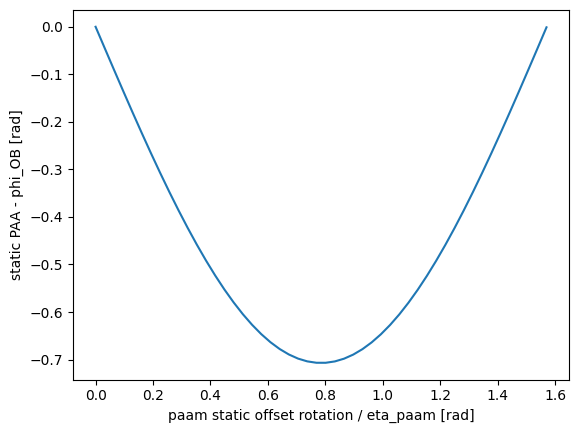

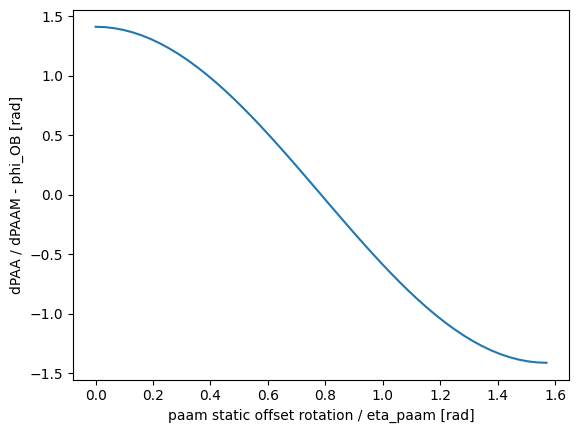

In [171]:
rotation_OB_z = [np.cross(tx_original_exit_OB, trace_paam_effect(rot))[-1] for rot in np.linspace(0,-3.14/2)]
pyplot.figure()
pyplot.plot(np.linspace(0,3.14/2),rotation_OB_z)
pyplot.xlabel("paam static offset rotation / eta_paam [rad]")
pyplot.ylabel("static PAA - phi_OB [rad]")
pyplot.figure()
pyplot.plot(np.linspace(0,3.14/2),np.gradient((rotation_OB_z),np.linspace(0,-3.14/2)))
pyplot.xlabel("paam static offset rotation / eta_paam [rad]")
pyplot.ylabel("dPAA / dPAAM - phi_OB [rad]")

## Propagate to Spacecraft and Constellation Frame 
....to be implemented